# COMPROBACIÓN EXPERIMENTAL DEL PRINCIPIO DE FUNCIONAMIENTO DE LA ECOSONDA 

#### Librerias a Utilizar

In [4]:
import os
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from lmfit import  Model

In [188]:
document='Datos_I8' #Documento de drive a manejar
drive = False
fsheet= None 
path = os.getcwd()
path = path[:path.rfind('/')+1]

In [6]:
def move_file(origin, destiny):
    os.rename(origin, destiny)

In [7]:
def get_drive_sheet():
    #Obtener datos de la hoja de datos
    scope = ['https://spreadsheets.google.com/feeds']
    creds = ServiceAccountCredentials.from_json_keyfile_name(path+'client_secret.json', scope)
    client = gspread.authorize(creds)
    return client.open(document)

#### Funcion para obtener los datos desde google sheets o un archivo local

In [8]:
def get_data():
    #Obtener directorio del JSON con las credenciales
    df={}
    if drive:
        fsheet=get_drive_sheet()
    #     tablas=[]
        for i in fsheet.worksheets():
#             tablas.append(i.get_all_records()) #get all shetts as a list
            df.update({i.title:pd.DataFrame(i.get_all_records())})
            pd.DataFrame(i.get_all_records()).to_pickle(document+i.title+".pk1")
            move_file(document+i.title+".pk1", 'database/'+document+i.title+".pk1")
    else:
        files = os.listdir(os.getcwd()+'/database/')

        for f in files:
            if '.pk1' in f:
                df.update({f.replace('.pk1', '').replace(document, ''):pd.read_pickle('database/'+f)})
       
    return df

#### Funcion para R cuadrado

In [9]:
def R_square(yydata, ydata):
    residuals = ydata- yydata
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [189]:
df= get_data()

#### Tabla 1.  Variación del campo eléctrico en diferentes puntos del espacio

In [132]:
df['Tabla_1']

X_1_+Y  X_1_-Y  X_2_+Y  X_2_-Y  X_3_+Y  X_3_-Y  X_4_+Y  X_4_-Y  X_5_+Y  \
0    8.61    9.30   12.00   10.60    8.35    8.16    6.00    6.48    4.58   
1    1.72    1.63    4.70    4.32    4.60    4.76    4.12    3.53    3.34   
2    0.65    0.58    1.42    1.20    2.70    2.25    2.45    2.35    2.20   
3    0.48    0.48    0.54    0.60    1.20    1.16    1.61    1.60    1.27   
4    0.47    0.47    0.52    0.52    0.62    0.55    0.75    0.68    1.01   

   X_5_-Y  distancia  
0    5.15        3.0  
1    3.53        6.0  
2    2.34        9.0  
3    1.57       12.0  
4    1.02       15.0

In [133]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig =plt.figure()
ax = fig.add_subplot(111, projection='3d')

fig.set_size_inches(12,10)
ax.grid(True)
ax.set_xlabel('X [cm]', fontsize=20)
ax.set_ylabel('Y [cm]', fontsize=20)
ax.set_zlabel('U [V]', fontsize=20)
ax.tick_params(labelsize=20)
colors=['red', 'coral', 'darkgoldenrod' , 'green', 'blue']
#Make data.
X=[25, 20, 15, 10, 5, 0, 5, 10, 15, 20, 25]
U_0=[11.42, 11.41, 11.3, 7.35, 6.18]
Y=[-15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15]
ZZ=[]
for i in range(1,6):
    Z=[]
    for j in reversed(df['Tabla_1']['X_{}_-Y'.format(i)]):
        Z.append(j)
    Z.append(U_0[i-1]);
    for j in df['Tabla_1']['X_{}_+Y'.format(i)]:
        Z.append(j)
    ZZ.append(Z)
    ax.plot(X,Y,Z,
              color=colors[i-1], marker='^', label='U_{}'.format(i))
#     ax.bar(X, Y, zs=Z, zdir='y', color=colors[i-1], alpha=0.8)

In [134]:
print(ZZ[1])

[0.52000000000000002, 0.59999999999999998, 1.2, 4.3200000000000003, 10.6, 11.41, 12.0, 4.7000000000000002, 1.4199999999999999, 0.54000000000000004, 0.52000000000000002]


In [135]:
legend1=ax.legend(loc='best', fontsize=16)

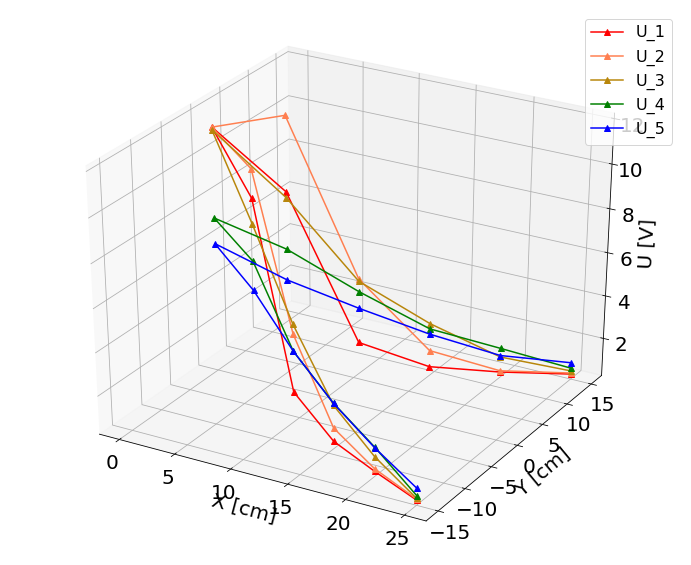

In [136]:
fig

In [137]:
fig.savefig('Figura1.png', dpi=100)
plt.close(fig)

In [172]:
df['Tabla_2']

U_1   U_2  U_norm  U_prom  theta
0   0.75  0.69   0.126   0.720      0
1   0.64  0.57   0.106   0.605     20
2   0.91  1.00   0.167   0.955     40
3   2.76  2.81   0.486   2.785     60
4   5.06  4.99   0.877   5.025     80
5   5.68  5.78   1.000   5.730    100
6   4.15  4.16   0.725   4.155    120
7   1.87  1.83   0.323   1.850    140
8   0.77  0.75   0.133   0.760    160
9   0.74  0.78   0.133   0.760    180
10  0.64  0.58   0.106   0.610    200
11  0.90  0.94   0.161   0.920    220
12  2.69  2.59   0.461   2.640    240
13  4.82  4.71   0.832   4.765    260
14  5.38  5.45   0.945   5.415    280
15  4.02  4.01   0.701   4.015    300
16  1.94  2.81   0.414   2.375    320
17  0.71  0.75   0.127   0.730    340

In [197]:
df['Tabla_3']

U_1   U_2  U_norm  U_prom  theta
0   0.52  0.60   0.215   0.560      0
1   0.62  0.58   0.231   0.600     20
2   1.04  1.06   0.404   1.050     40
3   0.92  0.88   0.346   0.900     60
4   0.53  0.57   0.212   0.550     80
5   0.64  0.68   0.254   0.660    100
6   1.92  1.88   0.731   1.900    120
7   2.63  2.57   1.000   2.600    140
8   1.81  1.72   0.679   1.765    160
9   0.64  0.60   0.238   0.620    180
10  0.65  0.68   0.256   0.665    200
11  1.19  1.11   0.442   1.150    220
12  0.89  0.93   0.350   0.910    240
13  0.56  0.51   0.206   0.535    260
14  0.61  0.64   0.240   0.625    280
15  1.77  1.80   0.687   1.785    300
16  2.58  2.52   0.981   2.550    320
17  1.76  1.74   0.673   1.750    340
18  0.52  0.60   0.215   0.560    360

In [193]:
fig1, axes1 = plt.subplots()
fig1.set_size_inches(8, 8)
axes1.grid(True)
axes1.set_xlabel(r'$\theta$', fontsize=20)
axes1.set_ylabel(r'U_norm', fontsize=20)
axes1.tick_params(labelsize=20)
axes1.plot(df['Tabla_2'].loc[:,'theta'], df['Tabla_3'].loc[:,'U_norm'], 'b+:', label='Parte 1 Fase 2')
# axes1.plot(df['Tabla_3'].loc[:,'theta'], df['Tabla_3'].loc[:,'U_norm'], 'r+:', label='Parte 2 Fase 2')

In [194]:
legend1=axes1.legend(loc='best', fontsize=16)

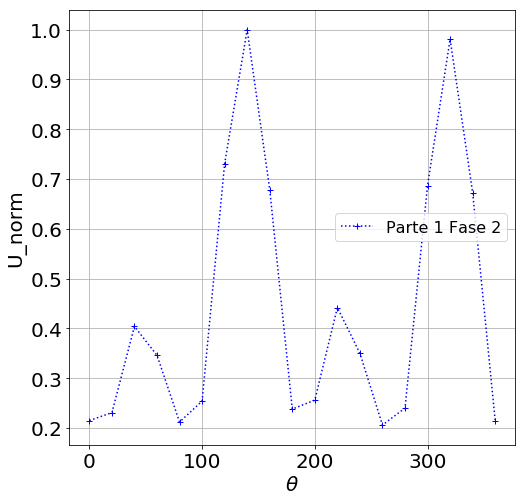

In [195]:
fig1

In [198]:
fig1.savefig('Figura2.jpg', dpi=100)
plt.close(fig1)

In [201]:
fig2, axes2 = plt.subplots()
fig2.set_size_inches(8, 8)
axes2.grid(True)
axes2.set_xlabel(r'$\theta$', fontsize=20)
axes2.set_ylabel(r'U_norm', fontsize=20)
axes2.tick_params(labelsize=20)
axes2.plot(df['Tabla_3'].loc[:,'theta'], df['Tabla_3'].loc[:,'U_norm'], 'r+:', label='Parte 2 Fase 2')

In [202]:
legend1=axes2.legend(loc='best', fontsize=16)

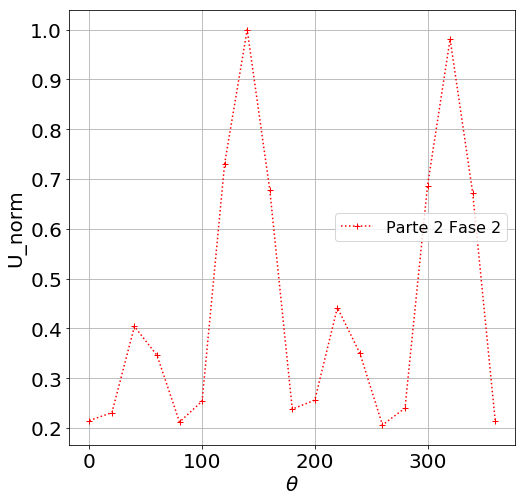

In [203]:
fig2

In [204]:
fig2.savefig('Figura3.jpg', dpi=100)
plt.close(fig2)

 -*- coding: utf-8 -*-
Created on Fri Oct  6 19:39:05 2017